# Import Python Library and Algorithms

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data_for_preproc'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import string
from nltk.util import ngrams
from collections import Counter
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression


In [3]:
import re

In [4]:
RANDOM_SEED = 42 
VAL_SIZE   = 0.2 # train = 0.8

# Import Data

In [5]:
train = pd.read_csv('train_24_02_2021.csv') #new parse data from auto.ru
# train = pd.read_csv('train_02_03_2021.csv') #new parse data from auto.ru


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
train = pd.read_csv('train_02_03_2021.csv') #new parse data from auto.ru


In [7]:
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

In [8]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60142 entries, 0 to 60141
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              60142 non-null  object 
 1   brand                 60142 non-null  object 
 2   description           58860 non-null  object 
 3   engineDisplacement    60142 non-null  int64  
 4   enginePower           60142 non-null  int64  
 5   equipment_dict        50683 non-null  object 
 6   fuelType              60142 non-null  object 
 7   image                 60142 non-null  object 
 8   mileage               60142 non-null  int64  
 9   modelDate             60142 non-null  int64  
 10  model_info            60142 non-null  object 
 11  model_name            60142 non-null  object 
 12  name                  60142 non-null  object 
 13  numberOfDoors         60142 non-null  int64  
 14  parsing_unixtime      60142 non-null  float64
 15  priceCurrency      

(None, None)

In [9]:
# columns_drop = ['Unnamed: 0']
# train = train.drop(columns_drop, axis=1)

**Concatenation Train data**

In [10]:
# train = pd.concat([train, ])

In [11]:
# train

**Drop duplicates and cleaning train dataset**

In [12]:
train = train.drop_duplicates()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 60141
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              60142 non-null  object 
 1   brand                 60142 non-null  object 
 2   description           58860 non-null  object 
 3   engineDisplacement    60142 non-null  int64  
 4   enginePower           60142 non-null  int64  
 5   equipment_dict        50683 non-null  object 
 6   fuelType              60142 non-null  object 
 7   image                 60142 non-null  object 
 8   mileage               60142 non-null  int64  
 9   modelDate             60142 non-null  int64  
 10  model_info            60142 non-null  object 
 11  model_name            60142 non-null  object 
 12  name                  60142 non-null  object 
 13  numberOfDoors         60142 non-null  int64  
 14  parsing_unixtime      60142 non-null  float64
 15  priceCurrency      

In [14]:
train.isna().sum()

bodyType                    0
brand                       0
description              1282
engineDisplacement          0
enginePower                 0
equipment_dict           9459
fuelType                    0
image                       0
mileage                     0
modelDate                   0
model_info                  0
model_name                  0
name                        0
numberOfDoors               0
parsing_unixtime            0
priceCurrency               0
productionDate              0
sell_id                     0
section                     0
url_saleid                  0
super_gen                   0
vehicleConfiguration        0
vehicleTransmission         0
vendor                      0
Владельцы               22486
ПТС                       472
Привод                      0
Руль                        0
Состояние                1061
Таможня                     5
price                       0
auto_class                209
price_segment               0
seller_typ

**У признака Price есть пропущенные значения. Сразу удаляем их и почистим строки**

In [15]:
train.dropna(subset=['price', 'Привод', 'Руль'], inplace=True)

In [16]:
test.head(3).T


,0,1,2
bodyType,лифтбек,лифтбек,лифтбек
brand,SKODA,SKODA,SKODA
car_url,https://auto.ru/cars/used/sale/skoda/octavia/1...,https://auto.ru/cars/used/sale/skoda/octavia/1...,https://auto.ru/cars/used/sale/skoda/superb/11...
color,синий,чёрный,серый
complectation_dict,NaN,NaN,"{""id"":""20026336"",""name"":""Ambition"",""available_..."
description,"Все автомобили, представленные в продаже, прох...",ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,"Все автомобили, представленные в продаже, прох..."
engineDisplacement,1.2 LTR,1.6 LTR,1.8 LTR
enginePower,105 N12,110 N12,152 N12
equipment_dict,"{""engine-proof"":true,""tinted-glass"":true,""airb...","{""cruise-control"":true,""asr"":true,""esp"":true,""...","{""cruise-control"":true,""tinted-glass"":true,""es..."
fuelType,бензин,бензин,бензин


In [17]:
test.info(), test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

(None,
 bodyType                    0
 brand                       0
 car_url                     0
 color                       0
 complectation_dict      28268
 description                 0
 engineDisplacement          0
 enginePower                 0
 equipment_dict           9996
 fuelType                    0
 image                       0
 mileage                     0
 modelDate                   0
 model_info                  0
 model_name                  0
 name                        0
 numberOfDoors               0
 parsing_unixtime            0
 priceCurrency               0
 productionDate              0
 sell_id                     0
 super_gen                   0
 vehicleConfiguration        0
 vehicleTransmission         0
 vendor                      0
 Владельцы                   0
 Владение                22691
 ПТС                         1
 Привод                      0
 Руль                        0
 Состояние                   0
 Таможня                     0
 

Тестовый датасет состоит из 32 признака и 34686 наблюдений.Из них dtypes: int64(6), object(26).А так же test имеет пропущенные данные.

In [18]:
categorical_feature = ['brand','color','fuelType','vehicleTransmission','vendor', 'bodyType']

In [19]:
train[categorical_feature].nunique()

brand                   23
color                   16
fuelType                 5
vehicleTransmission      4
vendor                   3
bodyType               120
dtype: int64

# Data preprocessing

**Создадим копии train и test . И будем работать с ними **

In [20]:
traincc = train.copy()
testcc = test.copy()

In [21]:
def preprocessing_train(df_input):
    
    
    df_output = df_input.copy()
    
    df_output.drop(['Состояние', 'Таможня', 'priceCurrency'], axis=1, inplace=True) #  все машины растаможены и в хорошем состояние
    
    
    
    # Feature Engineering 
    df_output['enginePower'] = df_output['enginePower'].apply(lambda x: int(re.findall('(\d+)', str(x))[0]))
    
    # color
    colors = {'040001': 'чёрный','FAFBFB': 'белый','97948F': 'серый','CACECB': 'серебристый','0000CC': 'синий',
              'EE1D19': 'красный','200204': 'бордовый','007F00': 'зелёный','C49648': 'коричневый','22A0F8': 'голубой',
              'DEA522': 'золотистый','FFD600': 'жёлтый','660099': 'пурпурный','4A2197': 'фиолетовый','FF8649': 'бежевый',
              'FFC0CB': 'розовый'}
    df_output['color'] = df_output['color'].replace(colors).apply(lambda x: x.lower())
    
    
    # vehicleTransmission
    
    vehicle = {'AUTOMATIC':'автоматическая','MECHANICAL':'механическая',
               'ROBOT':'роботизированная','VARIATOR':'вариатор'}
    df_output['vehicleTransmission'] = df_output['vehicleTransmission'].replace(vehicle)
    
    # ПТС
    df_output['ПТС'] = df_output['ПТС'].map({'ORIGINAL':'Оригинал','DUPLICATE':'Дубликат'})
    df_output['ПТС'] = df_output['ПТС'].fillna('Оригинал') # Заменяем пустых на более встречающийся
    
    # В train есть пустые значение,заменим их как неизвестные.
    
    df_output['vendor'] = df_output['vendor'].fillna('V_UNKNOWN') # Заменяем пустых на V_UNKNOWN
    
    
    # description
    
    df_output['description'] = df_output['description'].fillna('[]') 
    
    df_output['description_word'] = df_output['description'].apply(lambda x: [str(i).lower() for i in x.split()])
    
    df_output['leather']= df_output['description_word'].apply(lambda x: 
                                                1 if ('темный' and 'салон') in x else 0)
    df_output['carter']= df_output['description_word'].apply(lambda x: 
                                                1 if ('защита' and 'картера') in x else 0)
    df_output['ABS']= df_output['description_word'].apply(lambda x: 
                                                1 if ('антиблокировочная' and 'система') in x else 0)
    df_output['airbags']= df_output['description_word'].apply(lambda x: 
                                                1 if ('подушки' and 'безопасности') in x else 0)
    df_output['immob']= df_output['description_word'].apply(lambda x: 
                                                1 if ('иммобилайзер') in x else 0)
    df_output['central_locking']= df_output['description_word'].apply(lambda x: 
                                                1 if ('центральный' and 'замок') in x else 0)
    df_output['on_board_computer']= df_output['description_word'].apply(lambda x: 
                                                1 if ('бортовой' and 'компьютер') in x else 0)
    df_output['cruise_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('круиз-контроль') in x else 0)
    df_output['climat_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('климат-контроль') in x else 0)
    df_output['multi_rudder']= df_output['description_word'].apply(lambda x: 
                                                1 if ('мультифункциональный' and 'руль') in x else 0)
    df_output['power_steering']= df_output['description_word'].apply(lambda x: 
                                                1 if ('гидроусилитель' or 'гидро' or 'усилитель' and 'руля') in x else 0)
    df_output['light_and_rain_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('датчики' and 'света' and 'дождя') in x else 0)
    df_output['сarbon_body_kits']= df_output['description_word'].apply(lambda x: 
                                                1 if ('карбоновые' and 'обвесы') in x else 0)
    df_output['rear_diffuser_rkp']= df_output['description_word'].apply(lambda x: 
                                                1 if ('задний' and 'диффузор') in x else 0)
    df_output['door_closers']= df_output['description_word'].apply(lambda x: 
                                                1 if ('доводчики' and 'дверей') in x else 0)
    df_output['rear_view_camera']= df_output['description_word'].apply(lambda x: 
                                                1 if ('камера' or 'видеокамера' and 'заднего' and 'вида') in x else 0)
    df_output['amg']= df_output['description_word'].apply(lambda x: 
                                                1 if ('amg') in x else 0)
    df_output['bi_xenon_headlights']= df_output['description_word'].apply(lambda x: 
                                                1 if ('биксеноновые' and 'фары') in x else 0)
    df_output['from_salon']= df_output['description_word'].apply(lambda x: 
                                                1 if ('рольф' or 'панавто' or 'дилер' or 'кредит' or 'ликвидация') in x else 0)
    df_output['alloy_wheels']= df_output['description_word'].apply(lambda x: 
                                                1 if ('легкосплавные' or 'колесные' or 'диски') in x else 0)
    df_output['parking_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('парктроник' or 'парктронник') in x else 0)
    df_output['dents']= df_output['description_word'].apply(lambda x: 
                                                1 if ('вмятины' or 'вмятина' or 'царапина' or 'царапины' or 'трещина') in x else 0)
    df_output['roof_with_panoramic_view']= df_output['description_word'].apply(lambda x: 
                                                1 if ('панорамная' and 'крыша') in x else 0)
    
    # ################### fix ############################################################## 
    df_output['productionDate'] = df_output['productionDate'].values.astype('int64')
    df_output['sell_id'] = df_output['sell_id'].values.astype('int64')
    df_output['modelDate'] = df_output['modelDate'].values.astype('int64')
    df_output['numberOfDoors'] = df_output['numberOfDoors'].values.astype('int64')
    df_output['mileage'] = df_output['mileage'].values.astype('int64')
    df_output['mileageNAN'] = df_output['mileage'].apply(lambda x: 1 if x == 0 else 0)
    
    return df_output

In [22]:
def preprocessing_test(df_input):
    
    
    df_output = df_input.copy()
    
    df_output.drop(['Состояние', 'Таможня', 'priceCurrency'], axis=1, inplace=True) #  все машины растаможены и в хорошем состояние
    
    
    
    # Feature Engineering 
    df_output['enginePower'] = df_output['enginePower'].apply(lambda x: int(re.findall('(\d+)', str(x))[0]))
    
    # description
    
    df_output['description'] = df_output['description'].fillna('[]') 
    
    df_output['description_word'] = df_output['description'].apply(lambda x: [str(i).lower() for i in x.split()])
    
    df_output['leather']= df_output['description_word'].apply(lambda x: 
                                                1 if ('темный' and 'салон') in x else 0)
    df_output['carter']= df_output['description_word'].apply(lambda x: 
                                                1 if ('защита' and 'картера') in x else 0)
    df_output['ABS']= df_output['description_word'].apply(lambda x: 
                                                1 if ('антиблокировочная' and 'система') in x else 0)
    df_output['airbags']= df_output['description_word'].apply(lambda x: 
                                                1 if ('подушки' and 'безопасности') in x else 0)
    df_output['immob']= df_output['description_word'].apply(lambda x: 
                                                1 if ('иммобилайзер') in x else 0)
    df_output['central_locking']= df_output['description_word'].apply(lambda x: 
                                                1 if ('центральный' and 'замок') in x else 0)
    df_output['on_board_computer']= df_output['description_word'].apply(lambda x: 
                                                1 if ('бортовой' and 'компьютер') in x else 0)
    df_output['cruise_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('круиз-контроль') in x else 0)
    df_output['climat_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('климат-контроль') in x else 0)
    df_output['multi_rudder']= df_output['description_word'].apply(lambda x: 
                                                1 if ('мультифункциональный' and 'руль') in x else 0)
    df_output['power_steering']= df_output['description_word'].apply(lambda x: 
                                                1 if ('гидроусилитель' or 'гидро' or 'усилитель' and 'руля') in x else 0)
    df_output['light_and_rain_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('датчики' and 'света' and 'дождя') in x else 0)
    df_output['сarbon_body_kits']= df_output['description_word'].apply(lambda x: 
                                                1 if ('карбоновые' and 'обвесы') in x else 0)
    df_output['rear_diffuser_rkp']= df_output['description_word'].apply(lambda x: 
                                                1 if ('задний' and 'диффузор') in x else 0)
    df_output['door_closers']= df_output['description_word'].apply(lambda x: 
                                                1 if ('доводчики' and 'дверей') in x else 0)
    df_output['rear_view_camera']= df_output['description_word'].apply(lambda x: 
                                                1 if ('камера' or 'видеокамера' and 'заднего' and 'вида') in x else 0)
    df_output['amg']= df_output['description_word'].apply(lambda x: 
                                                1 if ('amg') in x else 0)
    df_output['bi_xenon_headlights']= df_output['description_word'].apply(lambda x: 
                                                1 if ('биксеноновые' and 'фары') in x else 0)
    df_output['from_salon']= df_output['description_word'].apply(lambda x: 
                                                1 if ('рольф' or 'панавто' or 'дилер' or 'кредит' or 'ликвидация') in x else 0)
    df_output['alloy_wheels']= df_output['description_word'].apply(lambda x: 
                                                1 if ('легкосплавные' or 'колесные' or 'диски') in x else 0)
    df_output['parking_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('парктроник' or 'парктронник') in x else 0)
    df_output['dents']= df_output['description_word'].apply(lambda x: 
                                                1 if ('вмятины' or 'вмятина' or 'царапина' or 'царапины' or 'трещина') in x else 0)
    df_output['roof_with_panoramic_view']= df_output['description_word'].apply(lambda x: 
                                                1 if ('панорамная' and 'крыша') in x else 0)
    
    return df_output

In [23]:
traincc = preprocessing_train(traincc)
testcc = preprocessing_test(testcc)


In [24]:
traincc.info(), testcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 60141
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  60142 non-null  object 
 1   brand                     60142 non-null  object 
 2   description               60142 non-null  object 
 3   engineDisplacement        60142 non-null  int64  
 4   enginePower               60142 non-null  int64  
 5   equipment_dict            50683 non-null  object 
 6   fuelType                  60142 non-null  object 
 7   image                     60142 non-null  object 
 8   mileage                   60142 non-null  int64  
 9   modelDate                 60142 non-null  int64  
 10  model_info                60142 non-null  object 
 11  model_name                60142 non-null  object 
 12  name                      60142 non-null  object 
 13  numberOfDoors             60142 non-null  int64  
 14  parsin

(None, None)

**Работаем с пустыми значениями**

In [25]:
traincc.isna().sum() , testcc.isna().sum()

(bodyType                        0
 brand                           0
 description                     0
 engineDisplacement              0
 enginePower                     0
 equipment_dict               9459
 fuelType                        0
 image                           0
 mileage                         0
 modelDate                       0
 model_info                      0
 model_name                      0
 name                            0
 numberOfDoors                   0
 parsing_unixtime                0
 productionDate                  0
 sell_id                         0
 section                         0
 url_saleid                      0
 super_gen                       0
 vehicleConfiguration            0
 vehicleTransmission             0
 vendor                          0
 Владельцы                   22486
 ПТС                             0
 Привод                          0
 Руль                            0
 price                           0
 auto_class         

In [26]:
testcc['ПТС'] = testcc['ПТС'].fillna('Оригинал')

Compare bodytype between train and test

In [27]:
testcc['bodyType'].value_counts()

седан                      13147
внедорожник 5 дв.          12228
лифтбек                     2232
хэтчбек 5 дв.               2124
универсал 5 дв.             1276
минивэн                      995
купе                         824
компактвэн                   489
хэтчбек 3 дв.                485
пикап двойная кабина         280
купе-хардтоп                 158
внедорожник 3 дв.            115
родстер                       99
фургон                        97
кабриолет                     90
седан-хардтоп                 12
микровэн                       7
седан 2 дв.                    6
лимузин                        6
пикап одинарная кабина         5
пикап полуторная кабина        5
внедорожник открытый           3
тарга                          2
фастбек                        1
Name: bodyType, dtype: int64

In [28]:
traincc['bodyType'] = traincc['bodyType'].apply(lambda x: str(x).lower())

In [29]:
def proc_bodyType(df_input):
    df_output = df_input.copy()
    df_output['bodyType'] = df_output['bodyType'].apply(lambda x: str(x))
    def bodyType(row):
        for body_type in ['седан', 'внедорожник 5 дв.', 'лифтбек','хэтчбек 5 дв.', 
                      'универсал 5 дв.','минивэн','купе','компактвэн','хэтчбек 3 дв.','пикап двойная кабина',
                         'внедорожник 3 дв.','родстер','фургон','кабриолет','седан-хардтоп','микровэн',
                         'седан 2 дв.','лимузин','пикап полуторная кабина','пикап одинарная кабина',
                         'внедорожник открытый','тарга','фастбек']:
            if row.lower().startswith(body_type):
                return body_type
    df_output['bodyType'] = df_output['bodyType'].apply(bodyType)
    df_output['bodyType'] = df_output['bodyType'].apply(lambda x: 'купе' if x == 'купе-хардтоп' else x)
    
    return df_output

In [30]:
traincc = proc_bodyType(traincc)

In [31]:
testcc = proc_bodyType(testcc)

In [32]:
traincc.bodyType.value_counts()

внедорожник 5 дв.          28316
седан                      16743
хэтчбек 5 дв.               4235
лифтбек                     3410
универсал 5 дв.             1723
купе                        1351
компактвэн                  1305
минивэн                     1163
хэтчбек 3 дв.               1120
внедорожник 3 дв.            302
пикап двойная кабина         226
родстер                       92
кабриолет                     77
фургон                        56
микровэн                      15
пикап одинарная кабина         3
тарга                          2
пикап полуторная кабина        1
внедорожник открытый           1
Name: bodyType, dtype: int64

In [33]:
testcc.bodyType.value_counts()

седан                      13165
внедорожник 5 дв.          12228
лифтбек                     2232
хэтчбек 5 дв.               2124
универсал 5 дв.             1276
минивэн                      995
купе                         982
компактвэн                   489
хэтчбек 3 дв.                485
пикап двойная кабина         280
внедорожник 3 дв.            115
родстер                       99
фургон                        97
кабриолет                     90
микровэн                       7
лимузин                        6
пикап одинарная кабина         5
пикап полуторная кабина        5
внедорожник открытый           3
тарга                          2
фастбек                        1
Name: bodyType, dtype: int64

In [34]:
traincc.bodyType.isna().sum(), testcc.bodyType.isna().sum()

(1, 0)

In [35]:
traincc['bodyType'] = traincc['bodyType'].fillna('other')

In [36]:
traincc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 60141
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  60142 non-null  object 
 1   brand                     60142 non-null  object 
 2   description               60142 non-null  object 
 3   engineDisplacement        60142 non-null  int64  
 4   enginePower               60142 non-null  int64  
 5   equipment_dict            50683 non-null  object 
 6   fuelType                  60142 non-null  object 
 7   image                     60142 non-null  object 
 8   mileage                   60142 non-null  int64  
 9   modelDate                 60142 non-null  int64  
 10  model_info                60142 non-null  object 
 11  model_name                60142 non-null  object 
 12  name                      60142 non-null  object 
 13  numberOfDoors             60142 non-null  int64  
 14  parsin

**У нас стоимости машины разбросаны, поэтому построим зависимость от логарифма цены**

In [37]:
traincc['log_price'] = np.log(traincc.price)

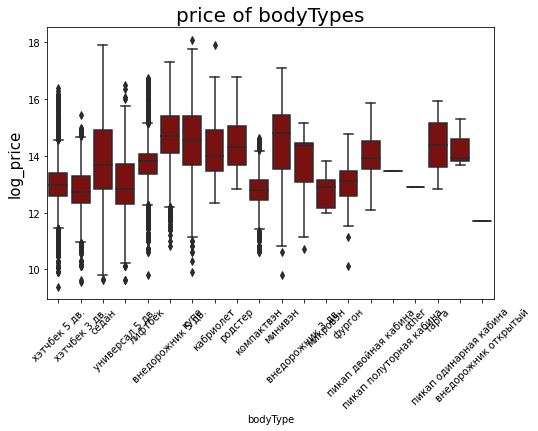

In [38]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='bodyType', 
                  data=traincc, color='darkred')
g1.set_title("price of bodyTypes", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [39]:
traincc = traincc.assign(bT_length = traincc['bodyType'].apply(len))
testcc = testcc.assign(bT_length = testcc['bodyType'].apply(len))

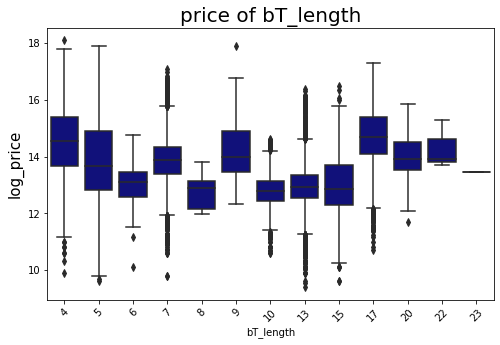

In [40]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='bT_length', 
                  data=traincc, color='darkblue')
g1.set_title("price of bT_length", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

**enginePower**

In [41]:
traincc['enginePower'].value_counts(),testcc['enginePower'].value_counts()

(150    5327
 249    4687
 140    1925
 190    1922
 110    1751
        ... 
 311       1
 477       1
 321       1
 232       1
 344       1
 Name: enginePower, Length: 336, dtype: int64,
 249    1708
 150    1699
 110    1039
 170     977
 105     955
        ... 
 38        1
 485       1
 324       1
 164       1
 32        1
 Name: enginePower, Length: 315, dtype: int64)

**Brand**

In [42]:
len(traincc.brand.value_counts()),len(testcc.brand.value_counts())



(23, 12)

In [43]:
brand = testcc.brand.value_counts()
brand

BMW           4473
VOLKSWAGEN    4404
NISSAN        4393
MERCEDES      4180
TOYOTA        3913
AUDI          3421
MITSUBISHI    2843
SKODA         2741
VOLVO         1463
HONDA         1150
INFINITI       871
LEXUS          834
Name: brand, dtype: int64

*Сравним с тестом оставим по брендам с теста , а остальных объединим как otherBrand*

In [44]:
traincc['brand'] = traincc['brand'].apply(lambda x: x if x in brand else 'otherBrand')

In [45]:
traincc['brand'].value_counts()

MERCEDES      15337
otherBrand    12668
BMW            6145
NISSAN         5340
AUDI           3438
SKODA          3410
MITSUBISHI     3179
VOLKSWAGEN     3134
TOYOTA         2783
VOLVO          1886
LEXUS          1142
HONDA           880
INFINITI        800
Name: brand, dtype: int64

In [46]:
traincc.groupby('brand').price.describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
AUDI,3438.0,2.434647e+06,2.112787e+06,25000.0,870000.0,1830000.0,3540000.0,15460400.0
BMW,6145.0,3.711547e+06,2.831002e+06,42000.0,1490000.0,3202700.0,4783500.0,16341200.0
HONDA,880.0,7.744780e+05,6.700825e+05,20000.0,375000.0,575000.0,986250.0,5789063.0
INFINITI,800.0,2.071430e+06,1.516129e+06,250000.0,1100000.0,1600000.0,2586250.0,7335000.0
LEXUS,1142.0,2.678252e+06,1.519643e+06,195000.0,1580000.0,2474500.0,3417500.0,9350000.0
MERCEDES,15337.0,5.642694e+06,4.653787e+06,18000.0,2400000.0,4648260.0,8232840.0,72000000.0
MITSUBISHI,3179.0,1.314455e+06,8.762441e+05,25000.0,390000.0,1450000.0,2080500.0,5500000.0
NISSAN,5340.0,1.157522e+06,7.419125e+05,20000.0,570000.0,990000.0,1755000.0,6700000.0
SKODA,3410.0,1.037503e+06,6.307288e+05,25000.0,572750.0,889000.0,1305000.0,3623872.0


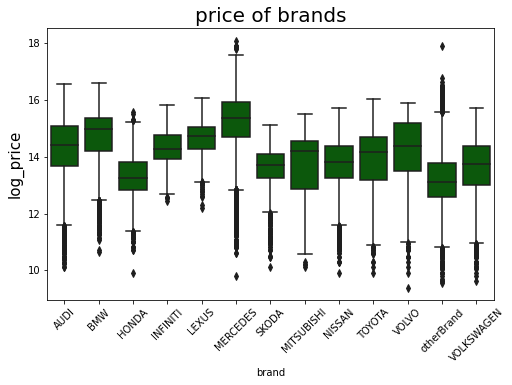

In [47]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='brand', 
                  data=traincc, color='darkgreen')
g1.set_title("price of brands", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

**Как мы видим  BMW ,LEXUS и Mercedes дороже **

In [48]:
traincc = traincc.assign(brand_length = traincc['brand'].apply(len))
testcc = testcc.assign(brand_length = testcc['brand'].apply(len))

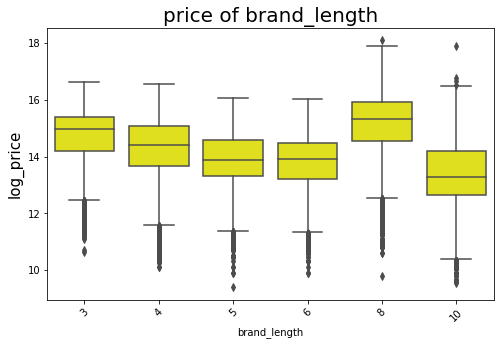

In [49]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='brand_length', 
                  data=traincc, color='yellow')
g1.set_title("price of brand_length", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [50]:
len(testcc.model_name.value_counts()), len(traincc.model_name.value_counts())

(544, 734)

In [51]:
testcc.equipment_dict.isna().sum(),traincc.equipment_dict.isna().sum()

(9996, 9459)

complectation_dict и equipment_dict удаляем ,много пропусков

In [52]:
traincc.isna().sum().value_counts(), testcc.isna().sum().value_counts()

(0        57
 9459      1
 22486     1
 209       1
 dtype: int64,
 0        52
 28268     1
 22691     1
 9996      1
 dtype: int64)

У нас еще есть пропуски по train-> name , vehicleConfiguration,vehicleTransmission,Комплектация,Владельцы,Владение ,hidden , model.......

In [53]:
traincc.isna().sum().head(30),traincc.isna().sum().tail(33)

(bodyType                    0
 brand                       0
 description                 0
 engineDisplacement          0
 enginePower                 0
 equipment_dict           9459
 fuelType                    0
 image                       0
 mileage                     0
 modelDate                   0
 model_info                  0
 model_name                  0
 name                        0
 numberOfDoors               0
 parsing_unixtime            0
 productionDate              0
 sell_id                     0
 section                     0
 url_saleid                  0
 super_gen                   0
 vehicleConfiguration        0
 vehicleTransmission         0
 vendor                      0
 Владельцы               22486
 ПТС                         0
 Привод                      0
 Руль                        0
 price                       0
 auto_class                209
 price_segment               0
 dtype: int64,
 price                         0
 auto_class           

In [54]:
# testcc.isna().sum().head(30)

In [55]:
# traincc['model_name'] = traincc['model_name'].fillna(traincc['model'])

In [56]:
traincc.model_info[4],testcc.model_info[4]

("{'code': 'A1', 'name': 'A1', 'ru_name': 'А1', 'morphology': {}, 'nameplate': {'code': '', 'name': '', 'semantic_url': ''}}",
 '{"code":"OCTAVIA","name":"Octavia","ru_name":"Октавия","morphology":{"gender":"FEMININE"},"nameplate":{"code":"","name":"","semantic_url":""}}')

In [57]:
testcc.equipment_dict.value_counts().head(5)

{"leather":true}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           108
{"gbo":true}                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [58]:
testcc.name[:30]

0          1.2 AMT (105 л.с.)
1           1.6 MT (110 л.с.)
2      DSG 1.8 AMT (152 л.с.)
3           1.6 AT (110 л.с.)
4           1.8 AT (152 л.с.)
5          2.0 AMT (200 л.с.)
6      1.8 AMT (152 л.с.) 4WD
7           1.6 MT (102 л.с.)
8       1.4 MT (150 л.с.) 4WD
9       1.8 MT (152 л.с.) 4WD
10           1.6 MT (90 л.с.)
11         1.4 AMT (150 л.с.)
12         1.8 AMT (180 л.с.)
13     1.4 AMT (150 л.с.) 4WD
14          1.6 AT (102 л.с.)
15         1.4 AMT (150 л.с.)
16         1.8 AMT (180 л.с.)
17         1.4 AMT (150 л.с.)
18          1.6 AT (110 л.с.)
19          1.6 AT (110 л.с.)
20     1.4 AMT (150 л.с.) 4WD
21    2.0d AMT (150 л.с.) 4WD
22          1.6 AT (110 л.с.)
23          1.8 AT (152 л.с.)
24         2.0 AMT (220 л.с.)
25          1.2 MT (105 л.с.)
26     DSG 1.8 AMT (152 л.с.)
27         1.8 AMT (180 л.с.)
28          1.4 MT (122 л.с.)
29          1.6 AT (105 л.с.)
Name: name, dtype: object

equipment_dict,name,model_info можем удалить ,Информация продублированы

**enginePower**

<AxesSubplot:>

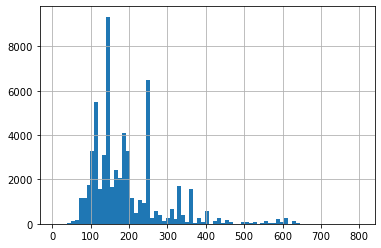

In [59]:
traincc['enginePower'].hist(bins=77)

In [60]:
traincc.enginePower.describe()

count    60142.000000
mean       194.127515
std         96.520143
min          7.000000
25%        135.000000
50%        169.000000
75%        245.000000
max        800.000000
Name: enginePower, dtype: float64

In [61]:
traincc['log_power'] = np.log(traincc.enginePower)

<AxesSubplot:>

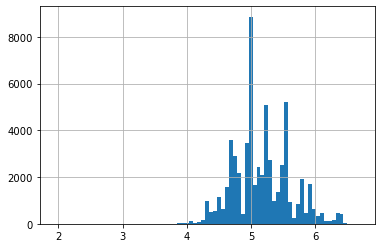

In [62]:
traincc['log_power'].hist(bins=77)

Логарифмирование enginePower метрику сильно  не улучшило.Попробуем ввести признак соответствующий налогу в зависимости от enginePower.

In [63]:
bins = [10, 35, 100, 125, 150, 175, 200, 225, 250, 801]
numbers = ['5000','12','25','35', '45', '50', '65', '75', '150']

In [64]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   bodyType                  34686 non-null  object
 1   brand                     34686 non-null  object
 2   car_url                   34686 non-null  object
 3   color                     34686 non-null  object
 4   complectation_dict        6418 non-null   object
 5   description               34686 non-null  object
 6   engineDisplacement        34686 non-null  object
 7   enginePower               34686 non-null  int64 
 8   equipment_dict            24690 non-null  object
 9   fuelType                  34686 non-null  object
 10  image                     34686 non-null  object
 11  mileage                   34686 non-null  int64 
 12  modelDate                 34686 non-null  int64 
 13  model_info                34686 non-null  object
 14  model_name            

In [65]:
traincc['Nalog_base']=pd.cut(traincc['enginePower'],bins,labels=numbers)
testcc['Nalog_base']=pd.cut(testcc['enginePower'],bins,labels=numbers)


In [66]:
# traincc['Nalog_base'].dropna()
traincc.dropna(subset=['Nalog_base'], inplace=True)

In [67]:
traincc['Nalog_base'] = traincc['Nalog_base'].values.astype('int64')
testcc['Nalog_base'] = testcc['Nalog_base'].values.astype('int64')

In [68]:
traincc['Nalog_base']

0        25
1        25
2        25
3        25
4        25
         ..
60137    25
60138    25
60139    12
60140    12
60141    12
Name: Nalog_base, Length: 60141, dtype: int64

In [69]:
testcc['enginePower'] = testcc['enginePower'].astype(float)

In [70]:
traincc['enginePower'] = traincc['enginePower'].astype(float)

In [71]:
testcc.enginePower.describe()

count    34686.000000
mean       188.194142
std         89.087035
min         30.000000
25%        125.000000
50%        169.000000
75%        233.000000
max        639.000000
Name: enginePower, dtype: float64

In [72]:
testcc['log_power'] = np.log(testcc.enginePower)

In [73]:
traincc['Nalog'] = traincc['enginePower'] * traincc['Nalog_base']
testcc['Nalog'] = testcc['enginePower'] * testcc['Nalog_base']

In [74]:
traincc['Nalog'] = traincc['Nalog'].astype(float)
testcc['Nalog'] = testcc['Nalog'].astype(float)

In [75]:
traincc['Nalog'] ,testcc['Nalog']

(0        3125.0
 1        3050.0
 2        3050.0
 3        3050.0
 4        3050.0
           ...  
 60137    2875.0
 60138    2875.0
 60139    1080.0
 60140    1080.0
 60141     900.0
 Name: Nalog, Length: 60141, dtype: float64,
 0         2625.0
 1         2750.0
 2         6840.0
 3         2750.0
 4         6840.0
           ...   
 34681     4760.0
 34682     9500.0
 34683     7650.0
 34684     9200.0
 34685    17625.0
 Name: Nalog, Length: 34686, dtype: float64)

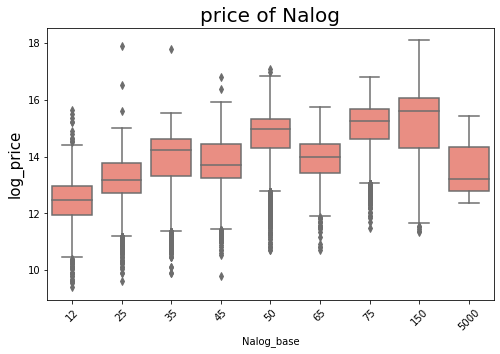

In [76]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='Nalog_base', 
                  data=traincc, color='salmon')
g1.set_title("price of Nalog", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

<AxesSubplot:xlabel='Nalog'>

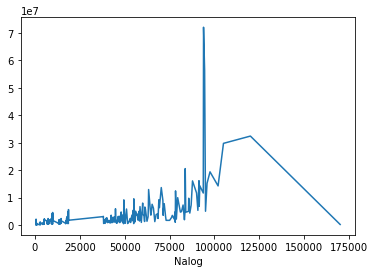

In [77]:
traincc.groupby('Nalog').price.mean().plot()


engineDisplacement

In [78]:
traincc.engineDisplacement.value_counts()

1598    7204
1998    3767
1991    2971
1997    2924
2925    2342
        ... 
3318       1
2084       1
1200       1
2404       1
1452       1
Name: engineDisplacement, Length: 479, dtype: int64

In [79]:
traincc['engineDisplacement'] = traincc['engineDisplacement'].values.astype('int')

In [80]:
# traincc['engineDisplacement'] = traincc['engineDisplacement'].apply(lambda x: x[:3])
testcc['engineDisplacement'] = testcc['engineDisplacement'].apply(lambda x: x[:3])

In [81]:
test['engineDisplacement'].value_counts()

2.0 LTR    7391
1.6 LTR    4973
3.0 LTR    3915
1.8 LTR    3349
2.5 LTR    2477
2.4 LTR    1745
3.5 LTR    1710
1.4 LTR    1635
1.5 LTR     725
1.2 LTR     485
4.4 LTR     447
2.8 LTR     384
4.7 LTR     377
1.3 LTR     365
5.5 LTR     361
4.0 LTR     356
3.2 LTR     348
4.5 LTR     346
2.1 LTR     271
3.7 LTR     242
2.2 LTR     236
4.2 LTR     228
1.9 LTR     221
2.3 LTR     203
2.7 LTR     189
3.6 LTR     183
5.6 LTR     170
5.0 LTR     158
5.7 LTR     135
2.9 LTR     131
4.6 LTR     108
3.1 LTR      88
4.8 LTR      84
1.7 LTR      59
3.8 LTR      57
1.0 LTR      57
2.6 LTR      55
 LTR         55
6.0 LTR      53
0.7 LTR      53
3.3 LTR      44
3.4 LTR      36
4.1 LTR      35
4.3 LTR      32
5.4 LTR      31
6.2 LTR      28
5.9 LTR      12
5.2 LTR      12
6.3 LTR       8
5.8 LTR       7
6.6 LTR       6
4.9 LTR       4
1.1 LTR       4
5.3 LTR       1
3.9 LTR       1
Name: engineDisplacement, dtype: int64

In [82]:
train['engineDisplacement'].value_counts()

1598    7204
1998    3767
1991    2971
1997    2924
2925    2342
        ... 
3318       1
2084       1
1200       1
2404       1
1452       1
Name: engineDisplacement, Length: 479, dtype: int64

In [83]:
traincc[traincc['engineDisplacement'] == 'S4']

,bodyType,brand,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,...,parking_sensors,dents,roof_with_panoramic_view,mileageNAN,log_price,bT_length,brand_length,log_power,Nalog_base,Nalog


In [84]:
len(testcc[testcc['engineDisplacement'] == ' LT'])

55

In [85]:
traincc[traincc['engineDisplacement'] == ' LT']

,bodyType,brand,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,...,parking_sensors,dents,roof_with_panoramic_view,mileageNAN,log_price,bT_length,brand_length,log_power,Nalog_base,Nalog


In [86]:
traincc.groupby('engineDisplacement').enginePower.describe().head(20)

,count,mean,std,min,25%,50%,75%,max
engineDisplacement,,,,,,,,
0,109.0,277.137615,147.947467,11.0,109.00,408.0,408.0,680.0
582,1.0,19.000000,NaN,19.0,19.00,19.0,19.0,19.0
647,11.0,171.272727,4.221159,170.0,170.00,170.0,170.0,184.0
656,4.0,56.750000,8.845903,46.0,51.25,58.5,64.0,64.0
657,4.0,49.000000,2.000000,48.0,48.00,48.0,49.0,52.0
658,35.0,54.057143,5.017281,46.0,52.00,52.0,56.5,64.0
659,1.0,64.000000,NaN,64.0,64.00,64.0,64.0,64.0
875,1.0,85.000000,NaN,85.0,85.00,85.0,85.0,85.0
970,1.0,45.000000,NaN,45.0,45.00,45.0,45.0,45.0


In [87]:
traincc['engineDisplacement'] = traincc['engineDisplacement'].apply(lambda x: 1.6 if x == ' LT' else x)
testcc['engineDisplacement'] = testcc['engineDisplacement'].apply(lambda x: 1.6 if x == ' LT' else x)

In [88]:
traincc['engineDisplacement'].value_counts()[:41].keys()

Int64Index([1598, 1998, 1991, 1997, 2925, 1950, 1995, 1984, 2993, 1798, 1395,
            2999, 3498, 1796, 1595, 1390, 1969, 1332, 2488, 2996, 2967, 1499,
            3982, 2987, 2143, 1968, 4395, 1781, 1999, 1587, 2995, 2487, 1364,
            3456, 2979, 2360, 1197, 1584, 1987, 1590, 1586],
           dtype='int64')

In [89]:
brand_list = list(traincc['engineDisplacement'].value_counts()[:41].keys())
traincc['engineDisplacement'] = traincc['engineDisplacement'].apply(lambda x: x if x in brand_list else 1.8)


<AxesSubplot:>

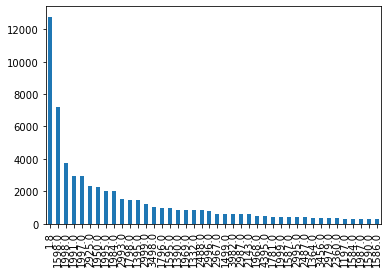

In [90]:
traincc['engineDisplacement'] = traincc['engineDisplacement'].astype('float')
traincc['engineDisplacement'].value_counts().plot(kind='bar')

In [91]:
traincc.vehicleTransmission.value_counts(),testcc.vehicleTransmission.value_counts()


(автоматическая      35006
 механическая        11197
 роботизированная     7381
 вариаторная          6557
 Name: vehicleTransmission, dtype: int64,
 автоматическая      19596
 механическая         7209
 вариатор             3999
 роботизированная     3882
 Name: vehicleTransmission, dtype: int64)

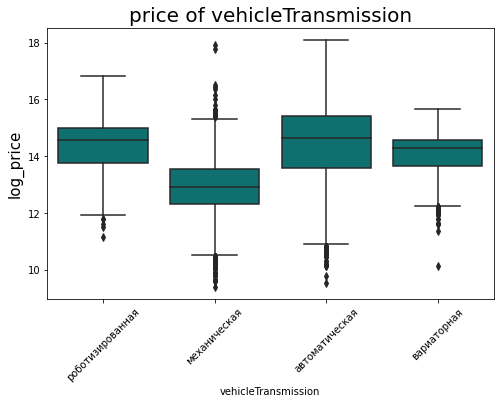

In [92]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='vehicleTransmission', 
                  data=traincc, color='teal')
g1.set_title("price of vehicleTransmission", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [93]:
traincc.vehicleConfiguration[67]

'SEDAN MECHANICAL 1.8\xa0MT'

In [94]:
testcc[testcc.numberOfDoors == 0] 

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,from_salon,alloy_wheels,parking_sensors,dents,roof_with_panoramic_view,bT_length,brand_length,Nalog_base,log_power,Nalog
16944,кабриолет,MERCEDES,https://auto.ru/cars/used/sale/mercedes/simple...,белый,NaN,"на ходу. 1904 год. стоит в гараже, пылится.Кат...",5.3,32.0,NaN,бензин,...,0,0,0,0,0,9,8,5000,3.465736,160000.0


In [95]:
traincc[traincc.numberOfDoors == 0]

,bodyType,brand,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,...,parking_sensors,dents,roof_with_panoramic_view,mileageNAN,log_price,bT_length,brand_length,log_power,Nalog_base,Nalog


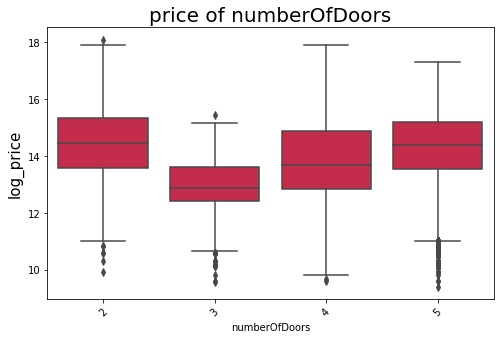

In [96]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='numberOfDoors', 
                  data=traincc, color='crimson')
g1.set_title("price of numberOfDoors", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [97]:
display(pd.DataFrame(traincc.color.value_counts()))

,color
черный,18328
белый,11599
серый,7807
синий,7118
серебристый,5034
красный,2975
коричневый,2245
зелёный,1550
бежевый.,1172
голубой,808


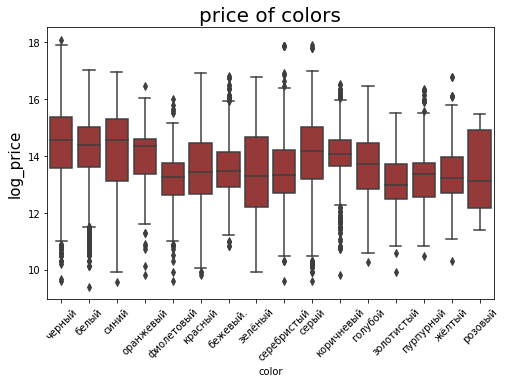

In [98]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='color', 
                  data=traincc, color='brown')
g1.set_title("price of colors", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

Узнаем сколько год машину

In [99]:
traincc['years_old'] = 2021 - traincc['productionDate']
testcc['years_old'] = 2021 - testcc['productionDate']

<AxesSubplot:>

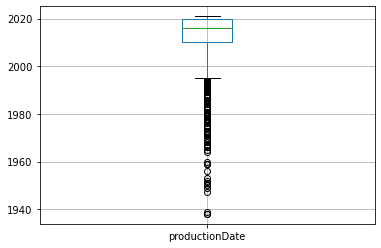

In [100]:
traincc.boxplot(column=['productionDate'])


In [101]:
traincc.years_old.value_counts().head(10)

1     15844
0      6668
9      3014
13     2972
10     2919
8      2777
7      2616
14     2100
2      1990
6      1966
Name: years_old, dtype: int64

In [102]:
traincc.years_old.describe(),testcc.years_old.describe()

(count    60141.000000
 mean         7.209275
 std          7.380562
 min          0.000000
 25%          1.000000
 50%          5.000000
 75%         11.000000
 max         83.000000
 Name: years_old, dtype: float64,
 count    34686.000000
 mean        11.735398
 std          7.047661
 min          1.000000
 25%          7.000000
 50%         10.000000
 75%         15.000000
 max        117.000000
 Name: years_old, dtype: float64)

*Разобьем возраст на интервалы*

In [103]:
bins = [-1, 3, 7, 14, 20, 35, 117]
numbers = ['3', '7','14','20','35', '117']

traincc['age_intervals']=pd.cut(traincc['years_old'],bins,labels=numbers)
testcc['age_intervals']=pd.cut(testcc['years_old'],bins,labels=numbers)

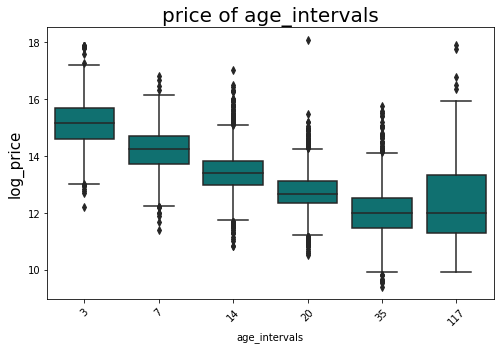

In [104]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='age_intervals', 
                  data=traincc, color='teal')
g1.set_title("price of age_intervals", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

modelDate

In [105]:
traincc.modelDate.describe(),testcc.modelDate.describe()

(count    60141.000000
 mean      2011.661429
 std          7.655939
 min       1936.000000
 25%       2007.000000
 50%       2013.000000
 75%       2018.000000
 max       2020.000000
 Name: modelDate, dtype: float64,
 count    34686.000000
 mean      2007.074728
 std          7.415894
 min       1904.000000
 25%       2004.000000
 50%       2008.000000
 75%       2012.000000
 max       2020.000000
 Name: modelDate, dtype: float64)

In [106]:
traincc.modelDate.value_counts().head()

2019    7261
2018    6737
2017    5183
2020    3646
2006    3008
Name: modelDate, dtype: int64

Владельцы

In [107]:
traincc['Владельцы'].isna().sum(),testcc['Владельцы'].isna().sum(),

(22486, 0)

In [108]:
traincc.Владельцы.value_counts() ,testcc.Владельцы.value_counts()

(3.0    15041
 1.0    11186
 2.0     9853
 4.0     1575
 Name: Владельцы, dtype: int64,
 3 или более    15957
 1 владелец      9459
 2 владельца     9270
 Name: Владельцы, dtype: int64)

In [109]:
testcc['Владельцы']= testcc['Владельцы'].astype('category')
traincc['Владельцы']= traincc['Владельцы'].astype('category')

traincc['Владельцы']= traincc['Владельцы'].apply(lambda x: int(re.findall('\d', str(x))[0]))
testcc['Владельцы']= testcc['Владельцы'].apply(lambda x: int(re.findall('\d', str(x))[0]))

<AxesSubplot:xlabel='Владельцы', ylabel='count'>

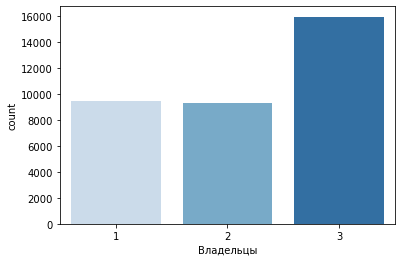

In [110]:
sns.countplot(x = "Владельцы", data = testcc, palette = "Blues")

<AxesSubplot:xlabel='Владельцы', ylabel='count'>

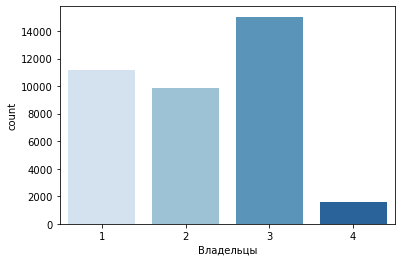

In [111]:
sns.countplot(x = "Владельцы", data = traincc, palette = "Blues")

In [112]:
traincc['Владельцы'] = traincc['Владельцы'].astype("category")

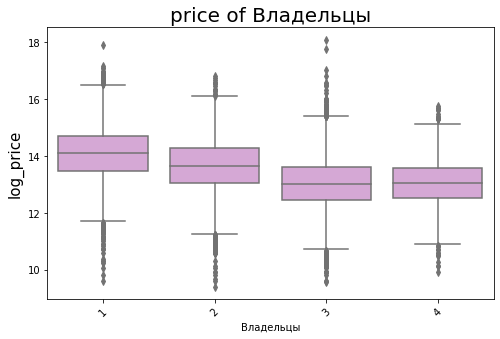

In [113]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='Владельцы', 
                  data=traincc, color='plum')
g1.set_title("price of Владельцы", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

 Число владельца напрямую влияет на цену.Как мы видим если в машине  1 Владелец,то этот машина дороже чем остальные

Владение

In [114]:
traincc.Владельцы.isna().sum(),testcc.Владение.isna().sum()

(22486, 22691)

In [115]:
traincc.groupby('Владельцы').describe()

engineDisplacement                                                 \
                       count         mean          std  min     25%     50%   
Владельцы                                                                     
1                    11186.0  1638.603236   968.877129  1.8  1395.0  1781.0   
2                     9853.0  1466.178281  1075.159402  1.8     1.8  1598.0   
3                    15041.0  1203.641261  1103.913360  1.8     1.8  1595.0   
4                     1575.0  1070.058286  1212.217745  1.8     1.8     1.8   

                          enginePower              ...    Nalog            \
              75%     max       count        mean  ...      75%       max   
Владельцы                                          ...                      
1          1998.0  4395.0     11186.0  182.102718  ...  13715.0   95850.0   
2          1997.0  4395.0      9853.0  182.650969  ...  14625.0   93750.0   
3          1984.0  4395.0     15041.0  172.180906  ...  13715.0  170000.0   
4          1984.0  4395.0      1575.0  186.939048  ...  14560.0   91800.0   

          years_old                                                    
              count       mean       std  min   25%   50%   75%   max  
Владельцы                                                              
1           11186.0   6.516002  4.724049  0.0   3.0   6.0   9.0  74.0  
2            9853.0   9.891302  5.438940  1.0   7.0   9.0  13.0  83.0  
3           15041.0  14.645968  6.615131  0.0  10.0  13.0  18.0  83.0  
4            1575.0  16.867302  6.746229  2.0  12.0  16.0  21.5  43.0  

[4 rows x 320 columns]

РУЛЬ

In [116]:
testcc.Руль.value_counts(), traincc.Руль.value_counts()

(Левый     33287
 Правый     1399
 Name: Руль, dtype: int64,
 левый     33296
 Левый     25792
 Правый      625
 правый      428
 Name: Руль, dtype: int64)

<AxesSubplot:>

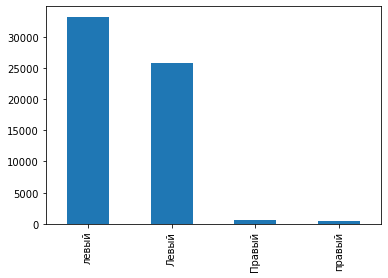

In [117]:
rule={'LEFT': 'Левый', 'RIGHT': 'Правый' }
traincc['Руль'] = traincc['Руль'].replace(rule)
traincc['Руль'].value_counts().plot.bar()

    **Как правило ,видим что леворульки больше чем правый**

**fuelType**

In [118]:
traincc.fuelType.value_counts(),testcc.fuelType.value_counts()

(бензин     46907
 дизель     12927
 гибрид       191
 электро      109
 газ            7
 Name: fuelType, dtype: int64,
 бензин     28601
 дизель      5800
 гибрид       223
 электро       55
 газ            7
 Name: fuelType, dtype: int64)

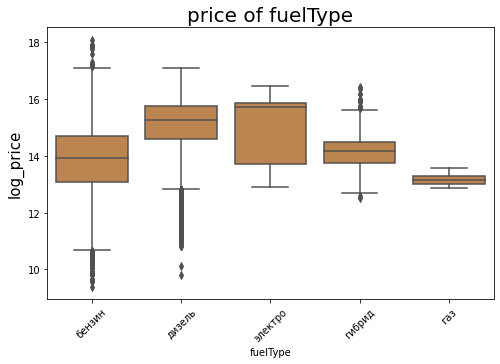

In [119]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='fuelType', 
                  data=traincc, color='peru')
g1.set_title("price of fuelType", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


plt.show()

In [120]:
testcc.super_gen[2]

'{"id":"20026323","nameplate":"DSG","displacement":1798,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"ROBOT","power":152,"power_kvt":112,"human_name":"DSG 1.8 AMT (152 л.с.)","acceleration":8.7,"clearance_min":139,"fuel_rate":7.1,"clearance_max":158}'

**vendor**

In [121]:
traincc.vendor.value_counts(),testcc.vendor.value_counts()

(EUROPEAN    42370
 JAPANESE    17770
 RUSSIAN         1
 Name: vendor, dtype: int64,
 EUROPEAN    20682
 JAPANESE    14004
 Name: vendor, dtype: int64)

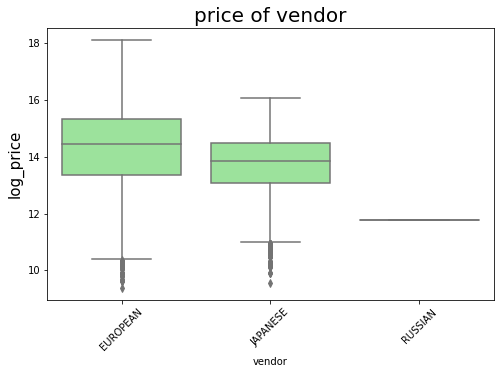

In [122]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='vendor', 
                  data=traincc, color='lightgreen')
g1.set_title("price of vendor", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


plt.show()

mileage

In [123]:
traincc.mileage.describe()

count      60141.000000
mean       95348.218686
std       106489.053980
min            0.000000
25%            0.000000
50%        70070.000000
75%       160883.000000
max      1000000.000000
Name: mileage, dtype: float64

In [124]:
traincc[traincc.mileage == 0].groupby('years_old').price.describe()

,count,mean,std,min,25%,50%,75%,max
years_old,,,,,,,,
0,6657.0,5.067661e+06,3.708994e+06,905000.0,2403500.0,4214000.0,6350024.0,24365400.0
1,15314.0,5.032906e+06,3.744219e+06,625000.0,2287037.5,3942600.0,7050000.0,32400000.0
2,489.0,7.431977e+06,4.721587e+06,1641000.0,3190000.0,6940980.0,11778335.0,19947600.0
3,26.0,3.108156e+07,2.593080e+07,2051000.0,6450863.0,26231045.5,58043592.0,58997576.0


In [125]:
traincc.groupby('years_old').mileage.mean().head(10)


years_old
0         0.033443
1       208.989334
2     19318.637688
3     49638.123018
4     70301.965785
5     85483.949340
6    100295.986267
7    112653.612768
8    124071.958228
9    137507.858660
Name: mileage, dtype: float64

Мы считали что в среднем за первый год машина проходит до 10 000 км, а после по  как минимум 20000 

In [126]:
traincc['mileageNAN'] = traincc.mileageNAN * (traincc.years_old * 20000 + 10000)

In [127]:
traincc.mileage = traincc.mileage + traincc.mileageNAN

In [128]:
traincc.mileage.describe()

count      60141.000000
mean      104530.972548
std        98828.827131
min            1.000000
25%        30000.000000
50%        70070.000000
75%       160883.000000
max      1000000.000000
Name: mileage, dtype: float64

In [129]:
traincc.groupby('years_old').mileage.mean().head(10)


years_old
0      9983.536743
1     29205.454873
2     31605.069849
3     50633.202296
4     70301.965785
5     85483.949340
6    100295.986267
7    112653.612768
8    124071.958228
9    137507.858660
Name: mileage, dtype: float64

In [130]:
traincc[traincc.mileage == 1].productionDate

8047     2021
11175    2020
11176    2020
11236    2020
11237    2020
11238    2020
11239    2020
32182    2020
35326    2001
41458    1967
51645    1956
Name: productionDate, dtype: int64

Новый машина пробег = 1 это слишком мало .Поэтому тоже изменим

In [131]:
traincc['mileage'] = traincc['mileage'].apply(lambda x: 1000 if x <100 else x)
testcc['mileage'] = testcc['mileage'].apply(lambda x: 1000 if x < 100 else x)

In [132]:
traincc.mileage.describe(),testcc.mileage.describe()

(count      60141.000000
 mean      104533.468233
 std        98826.200282
 min          100.000000
 25%        30000.000000
 50%        70070.000000
 75%       160883.000000
 max      1000000.000000
 Name: mileage, dtype: float64,
 count      34686.000000
 mean      162012.941360
 std       100671.468542
 min          100.000000
 25%        91153.500000
 50%       149779.500000
 75%       215000.000000
 max      1000000.000000
 Name: mileage, dtype: float64)

Привод

In [133]:
testcc.Привод.value_counts(),traincc.Привод.value_counts()

(передний    15565
 полный      15020
 задний       4101
 Name: Привод, dtype: int64,
 полный      31369
 передний    23759
 задний       5013
 Name: Привод, dtype: int64)

<AxesSubplot:xlabel='Привод', ylabel='count'>

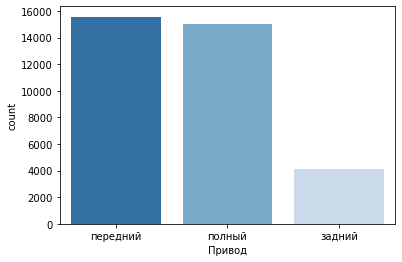

In [134]:
sns.countplot(x = "Привод", data = testcc, palette = "Blues_r")

<AxesSubplot:xlabel='Привод', ylabel='count'>

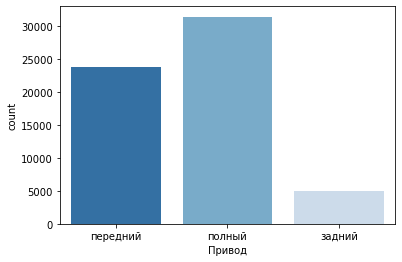

In [135]:
sns.countplot(x = "Привод", data = train, palette = "Blues_r")

**price**

<AxesSubplot:>

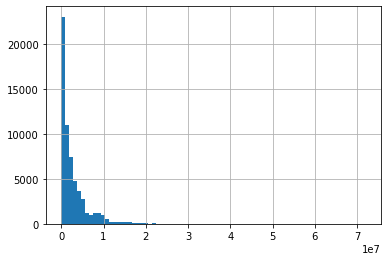

In [136]:
traincc['price'].hist(bins=77)

<AxesSubplot:>

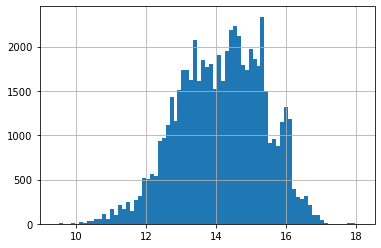

In [137]:
traincc['log_price'].hist(bins=77)

Drop columns

In [138]:
asdasdas

NameError: name 'asdasdas' is not defined

In [142]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  34686 non-null  object  
 1   brand                     34686 non-null  object  
 2   car_url                   34686 non-null  object  
 3   color                     34686 non-null  object  
 4   complectation_dict        6418 non-null   object  
 5   description               34686 non-null  object  
 6   engineDisplacement        34686 non-null  object  
 7   enginePower               34686 non-null  float64 
 8   equipment_dict            24690 non-null  object  
 9   fuelType                  34686 non-null  object  
 10  image                     34686 non-null  object  
 11  mileage                   34686 non-null  int64   
 12  modelDate                 34686 non-null  int64   
 13  model_info                34686 non-null  obje

In [139]:
# Новый признак выделяющий AT, AMT, MT, CVT из признака name
traincc['name_AMT_CVT'] = "-"
for i  in [' AT ', ' MT ', ' AMT ', ' CVT ']: 
    i_ = i.replace(" ","") 
    traincc['name_AMT_CVT'] = traincc.apply(lambda x: i_ if i in x['name'] else x['name_AMT_CVT'], axis = 1)

In [140]:
# Новый признак выделяющий AT, AMT, MT, CVT из признака name
testcc['name_AMT_CVT'] = "-"
for i  in [' AT ', ' MT ', ' AMT ', ' CVT ']: 
    i_ = i.replace(" ","") 
    testcc['name_AMT_CVT'] = testcc.apply(lambda x: i_ if i in x['name'] else x['name_AMT_CVT'], axis = 1)

In [143]:
# Новый признак выделяющий объем двигателя из признака name
traincc['name_4WD'] = traincc['name'].str.contains('4WD').astype('float64')*2 - 1
# Новый признак выделяющий объем двигателя из признака name
testcc['name_4WD'] = testcc['name'].str.contains('4WD').astype('float64')*2 - 1

In [144]:
# Новый признак выделяющий 4WD из признака name
def AMT_CVT_find(x):
    for i  in [' AT ', ' MT ', ' AMT ', ' CVT ']: 
        if i in x:
            x = x.replace('hyb',"")
            a = x.find(i)
            if len(x[:a])<4:
                b = x[:a]
            else:
                b = x[a-4:a]
            if b.endswith('d'):
                b = b[:-1]
            b = b.replace(" ","")
            if b == 'ctro':
                b = '2.0'
    return b

traincc['vol_engine'] = traincc['name'].apply(AMT_CVT_find)
traincc = traincc.replace({'vol_engine': r'peS'}, {'vol_engine': '0.0'}, regex=True)
traincc['vol_engine'] = traincc['vol_engine'].astype('float64')

testcc['vol_engine'] = testcc['name'].apply(AMT_CVT_find)
testcc = testcc.replace({'vol_engine': r'peS'}, {'vol_engine': '0.0'}, regex=True)
testcc['vol_engine'] = testcc['vol_engine'].astype('float64')

In [145]:
# Новый признак выделяющий мощность из признака name 
coeff_power_to_hourse = 1.35962
traincc['HPower'] = traincc['name'].apply(lambda x: x[x.find('(')+1: x.find('л.с.')-1] 
                                    if x.find('л.с.') != -1 else x[x.find('(')+1: x.find('кВт')-1])
traincc['HPower'] = traincc['HPower'].astype('float64')
traincc['HPower'] = traincc.apply(lambda x: int(coeff_power_to_hourse*x['HPower']) 
                            if 'кВт' in x['name'] else x['HPower'], axis = 1)
traincc['HPower'] = traincc['HPower'].apply(lambda x: np.log(x+1))


In [146]:
# Новый признак выделяющий мощность из признака name 
coeff_power_to_hourse = 1.35962
testcc['HPower'] = testcc['name'].apply(lambda x: x[x.find('(')+1: x.find('л.с.')-1] 
                                    if x.find('л.с.') != -1 else x[x.find('(')+1: x.find('кВт')-1])
testcc['HPower'] = testcc['HPower'].astype('float64')
testcc['HPower'] = testcc.apply(lambda x: int(coeff_power_to_hourse*x['HPower']) 
                            if 'кВт' in x['name'] else x['HPower'], axis = 1)
testcc['HPower'] = testcc['HPower'].apply(lambda x: np.log(x+1))

In [147]:
traincc1 = traincc

In [148]:
testcc1 = testcc

In [149]:
traincc1['numberOfDoors'] = traincc1['numberOfDoors'].astype('float64')
traincc1['numberOfDoors'] = traincc1['numberOfDoors'].apply(lambda x: 5 if x == 0 else x)

In [150]:
testcc.numberOfDoors.value_counts()

5    18703
4    14126
2     1206
3      650
0        1
Name: numberOfDoors, dtype: int64

In [151]:
testcc1['numberOfDoors'] = testcc1['numberOfDoors'].astype('float64')
testcc1['numberOfDoors'] = testcc1['numberOfDoors'].apply(lambda x: 5 if x == 0 else x)

In [152]:
# Формирование признака разницы дат
traincc1['modelDate'] = traincc1['modelDate'].max() - traincc1['modelDate']
traincc1['productionDate'] = traincc1['productionDate'].max() - traincc1['productionDate']
traincc1['DeltaDate'] = traincc1['modelDate'] - traincc1['productionDate']   

traincc1['modelDate'] = traincc1['modelDate'].apply(lambda x: np.log(x+1))
traincc1['productionDate'] = traincc1['productionDate'].apply(lambda x: np.log(x+1))

In [153]:
traincc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   description               60141 non-null  object  
 3   engineDisplacement        60141 non-null  float64 
 4   enginePower               60141 non-null  float64 
 5   equipment_dict            50683 non-null  object  
 6   fuelType                  60141 non-null  object  
 7   image                     60141 non-null  object  
 8   mileage                   60141 non-null  int64   
 9   modelDate                 60141 non-null  float64 
 10  model_info                60141 non-null  object  
 11  model_name                60141 non-null  object  
 12  name                      60141 non-null  object  
 13  numberOfDoors             60141 non-null  floa

In [154]:
testcc1['Владельцы'].value_counts()

3    15957
1     9459
2     9270
Name: Владельцы, dtype: int64

In [155]:
# Формирование признакvа разницы дат
testcc1['modelDate'] = testcc1['modelDate'].max() - testcc1['modelDate']
testcc1['productionDate'] = testcc1['productionDate'].max() - testcc1['productionDate']
testcc1['DeltaDate'] = testcc1['modelDate'] - testcc1['productionDate']   

testcc1['modelDate'] = testcc1['modelDate'].apply(lambda x: np.log(x+1))
testcc1['productionDate'] = testcc1['productionDate'].apply(lambda x: np.log(x+1))

In [156]:
testn=testcc
trainn=traincc

In [157]:
traincc1=traincc
testcc1=testcc

In [158]:
columns_drop1 = ['model_info', 'name', 'car_url', 'sell_id', 'complectation_dict', 'equipment_dict',
                'vehicleConfiguration','Владение', 'image', 'parsing_unixtime', 'super_gen',
                'description',  'log_power']
columns_drop2 = ['model_info', 'name', 'sell_id', 'complectation_dict', 'equipment_dict',
                'vehicleConfiguration','Владение', 'image', 'super_gen','description',  'log_power',
                 'mileageNAN','hidden', 'price_EUR', 'price_USD','Комплектация','model','start_date']

In [159]:
traincc

,bodyType,brand,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,...,log_power,Nalog_base,Nalog,years_old,age_intervals,name_AMT_CVT,name_4WD,vol_engine,HPower,DeltaDate
0,хэтчбек 5 дв.,AUDI,"- Ксенон\r\n- Датчики света, дождя\r\n- 1х зон...",1395.0,125.0,"{'electro-window-back': True, 'alloy-wheel-dis...",бензин,//avatars.mds.yandex.net/get-autoru-vos/438758...,56627,1.945910,...,4.828314,25,3125.0,6,7,AMT,-1.0,1.4,4.836282,0
1,хэтчбек 5 дв.,AUDI,"Автомобиль в отличном состоянии, ездила девушк...",1390.0,122.0,NaN,бензин,//avatars.mds.yandex.net/get-autoru-vos/158389...,39500,2.397895,...,4.804021,25,3050.0,7,7,AMT,-1.0,1.4,4.812184,3
2,хэтчбек 5 дв.,AUDI,Внимание! Только для клиентов AVILON Автомобил...,1390.0,122.0,"{'asr': True, 'airbag-driver': True, 'aux': Tr...",бензин,//avatars.mds.yandex.net/get-autoru-vos/204964...,73528,2.397895,...,4.804021,25,3050.0,7,7,AMT,-1.0,1.4,4.812184,3
3,хэтчбек 5 дв.,AUDI,Комплект новых зимних шин на дисках в подарок....,1390.0,122.0,"{'alloy-wheel-disks': True, 'abs': True, 'esp'...",бензин,//avatars.mds.yandex.net/get-autoru-vos/209532...,95400,2.397895,...,4.804021,25,3050.0,6,7,AMT,-1.0,1.4,4.812184,4
4,хэтчбек 3 дв.,AUDI,Все по регламенту много что делалось по машине...,1390.0,122.0,"{'engine-proof': True, 'esp': True, 'airbag-dr...",бензин,//avatars.mds.yandex.net/get-autoru-vos/218118...,149000,2.397895,...,4.804021,25,3050.0,9,14,AMT,-1.0,1.4,4.812184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60137,седан,VOLKSWAGEN,"Машина в хорошем состоянии для своих лет,при о...",1984.0,115.0,NaN,бензин,//avatars.mds.yandex.net/get-autoru-vos/219862...,260000,3.401197,...,4.744932,25,2875.0,29,35,MT,-1.0,2.0,4.753590,0
60138,седан,VOLKSWAGEN,"Полностью обслужена,все дно переварили в июле,...",1984.0,115.0,"{'passenger-seat-updown': True, 'airbag-passen...",бензин,//avatars.mds.yandex.net/get-autoru-vos/218118...,250000,3.401197,...,4.744932,25,2875.0,28,35,AT,-1.0,2.0,4.753590,1
60139,седан,VOLKSWAGEN,Покупалась временно до покупки нового Авто. Ст...,1781.0,90.0,NaN,бензин,//avatars.mds.yandex.net/get-autoru-vos/220317...,180580,3.401197,...,4.499810,12,1080.0,27,35,MT,-1.0,1.8,4.510860,2
60140,седан,VOLKSWAGEN,"В хорошем состоянии, сел и поехал. Масло мен...",1781.0,90.0,"{'engine-proof': True, 'ptf': True, 'airbag-dr...",бензин,//avatars.mds.yandex.net/get-autoru-vos/215936...,177000,3.401197,...,4.499810,12,1080.0,27,35,AT,-1.0,1.8,4.510860,2


In [160]:
testcc.drop(columns_drop1, axis=1, inplace=True,errors= 'ignore')
traincc.drop(columns_drop2, axis=1, inplace=True,errors= 'ignore')

In [161]:
traincc['model_name'] = traincc['model_name'].fillna(traincc['model_name'].describe().top)
traincc['Владельцы'] = traincc['Владельцы'].fillna(traincc['Владельцы'].describe().top)

In [162]:
traincc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   engineDisplacement        60141 non-null  float64 
 3   enginePower               60141 non-null  float64 
 4   fuelType                  60141 non-null  object  
 5   mileage                   60141 non-null  int64   
 6   modelDate                 60141 non-null  float64 
 7   model_name                60141 non-null  object  
 8   numberOfDoors             60141 non-null  float64 
 9   parsing_unixtime          60141 non-null  float64 
 10  productionDate            60141 non-null  float64 
 11  section                   60141 non-null  object  
 12  url_saleid                60141 non-null  object  
 13  vehicleTransmission       60141 non-null  obje

In [163]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  34686 non-null  object  
 1   brand                     34686 non-null  object  
 2   color                     34686 non-null  object  
 3   engineDisplacement        34686 non-null  object  
 4   enginePower               34686 non-null  float64 
 5   fuelType                  34686 non-null  object  
 6   mileage                   34686 non-null  int64   
 7   modelDate                 34686 non-null  float64 
 8   model_name                34686 non-null  object  
 9   numberOfDoors             34686 non-null  float64 
 10  productionDate            34686 non-null  float64 
 11  vehicleTransmission       34686 non-null  object  
 12  vendor                    34686 non-null  object  
 13  Владельцы                 34686 non-null  cate

In [164]:
num_cols = ['engineDisplacement', 'enginePower', 'mileage', 'bT_length', 'Nalog_base',
       'brand_length', 'Nalog', 'years_old', 'log_price']

In [ ]:
correlation = traincc[num_cols].corr()
correlation

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [165]:
columns_d = ['brand_length','description_word']
traincc.drop(columns_d, axis=1, inplace=True)
testcc.drop(columns_d, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

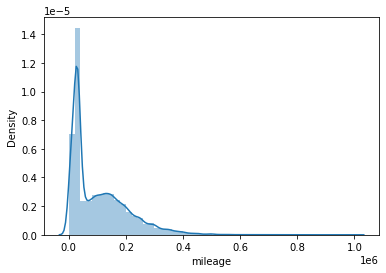

In [166]:
sns.distplot(traincc['mileage'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

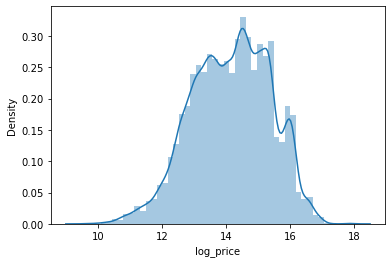

In [167]:
sns.distplot(traincc['log_price'])

In [168]:
asd

NameError: name 'asd' is not defined

In [169]:
traincc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   engineDisplacement        60141 non-null  float64 
 3   enginePower               60141 non-null  float64 
 4   fuelType                  60141 non-null  object  
 5   mileage                   60141 non-null  int64   
 6   modelDate                 60141 non-null  float64 
 7   model_name                60141 non-null  object  
 8   numberOfDoors             60141 non-null  float64 
 9   parsing_unixtime          60141 non-null  float64 
 10  productionDate            60141 non-null  float64 
 11  section                   60141 non-null  object  
 12  url_saleid                60141 non-null  object  
 13  vehicleTransmission       60141 non-null  obje

In [170]:
columns_drop = ['engineDisplacement']
traincc = traincc.drop(columns_drop, axis=1)

In [171]:
columns_drop = ['engineDisplacement']
testcc = testcc.drop(columns_drop, axis=1)

**Concatenation train and test **

In [172]:
columns = list(testcc.columns) 

In [173]:
columns.remove('Nalog_base')

In [174]:
len(columns)

48

In [175]:
df_train = traincc[columns]
df_test = testcc[columns]

In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   color                     60141 non-null  object  
 3   enginePower               60141 non-null  float64 
 4   fuelType                  60141 non-null  object  
 5   mileage                   60141 non-null  int64   
 6   modelDate                 60141 non-null  float64 
 7   model_name                60141 non-null  object  
 8   numberOfDoors             60141 non-null  float64 
 9   productionDate            60141 non-null  float64 
 10  vehicleTransmission       60141 non-null  object  
 11  vendor                    60141 non-null  object  
 12  Владельцы                 60141 non-null  category
 13  ПТС                       60141 non-null  obje

In [177]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  34686 non-null  object  
 1   brand                     34686 non-null  object  
 2   color                     34686 non-null  object  
 3   enginePower               34686 non-null  float64 
 4   fuelType                  34686 non-null  object  
 5   mileage                   34686 non-null  int64   
 6   modelDate                 34686 non-null  float64 
 7   model_name                34686 non-null  object  
 8   numberOfDoors             34686 non-null  float64 
 9   productionDate            34686 non-null  float64 
 10  vehicleTransmission       34686 non-null  object  
 11  vendor                    34686 non-null  object  
 12  Владельцы                 34686 non-null  category
 13  ПТС                       34686 non-null  obje

In [178]:
y = traincc['price']

In [179]:
# y.to_csv('yy2201.csv', encoding = 'utf-8')

In [180]:
y

0        956000
1        745000
2        825000
3        880000
4        550000
          ...  
60137     40000
60138    100000
60139     65000
60140    110000
60141    100000
Name: price, Length: 60141, dtype: int64

In [181]:
df_test

,bodyType,brand,color,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,...,roof_with_panoramic_view,bT_length,Nalog,years_old,age_intervals,name_AMT_CVT,name_4WD,vol_engine,HPower,DeltaDate
0,лифтбек,SKODA,синий,105.0,бензин,74000,2.079442,OCTAVIA,5.0,1.945910,...,0,7,2625.0,7,7,AMT,-1.0,1.2,4.663439,1
1,лифтбек,SKODA,чёрный,110.0,бензин,60563,1.386294,OCTAVIA,5.0,1.386294,...,0,7,2750.0,4,7,MT,-1.0,1.6,4.709530,0
2,лифтбек,SKODA,серый,152.0,бензин,88000,2.079442,SUPERB,5.0,1.945910,...,0,7,6840.0,7,7,AMT,-1.0,1.8,5.030438,1
3,лифтбек,SKODA,коричневый,110.0,бензин,95000,2.079442,OCTAVIA,5.0,1.945910,...,0,7,2750.0,7,7,AT,-1.0,1.6,4.709530,1
4,лифтбек,SKODA,белый,152.0,бензин,58536,2.564949,OCTAVIA,5.0,2.197225,...,0,7,6840.0,9,14,AT,-1.0,1.8,5.030438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34681,седан,BMW,коричневый,136.0,бензин,115000,2.302585,3ER,4.0,1.945910,...,0,5,4760.0,7,7,AT,-1.0,1.6,4.919981,3
34682,седан,BMW,чёрный,190.0,дизель,98000,1.609438,5ER,4.0,1.098612,...,0,5,9500.0,3,3,AT,1.0,2.0,5.252273,2
34683,седан,BMW,серый,170.0,бензин,360000,3.258097,5ER,4.0,3.178054,...,0,5,7650.0,24,35,AT,-1.0,2.5,5.141664,2
34684,внедорожник 5 дв.,BMW,коричневый,184.0,дизель,90500,2.197225,X1,5.0,2.079442,...,0,17,9200.0,8,14,AT,1.0,2.0,5.220356,1


# Label Encoding

In [182]:
df_test['sample'] = 0 # тест

In [183]:
df_train['sample'] = 1 # трейн


<ipython-input-183-5915a13b6c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sample'] = 1 # трейн


In [184]:
# columns_drop = ['engineDisplacement']
# data = train.drop(columns_drop, axis=1)

In [185]:
data = df_test.append(df_train, sort=False).reset_index(drop=True) 

In [186]:
data.isna().sum()

bodyType                    0
brand                       0
color                       0
enginePower                 0
fuelType                    0
mileage                     0
modelDate                   0
model_name                  0
numberOfDoors               0
productionDate              0
vehicleTransmission         0
vendor                      0
Владельцы                   0
ПТС                         0
Привод                      0
Руль                        0
leather                     0
carter                      0
ABS                         0
airbags                     0
immob                       0
central_locking             0
on_board_computer           0
cruise_control              0
climat_control              0
multi_rudder                0
power_steering              0
light_and_rain_sensors      0
сarbon_body_kits            0
rear_diffuser_rkp           0
door_closers                0
rear_view_camera            0
amg                         0
bi_xenon_h

In [200]:
for column in ['bodyType', 'brand', 'color', 'fuelType', 'model_name', 'vendor', 'Владельцы', 'vehicleTransmission', 'Привод', 'age_intervals','name_AMT_CVT']:
    data[column] = data[column].astype('category').cat.codes

In [201]:
bin_cols = ['ПТС', 'Руль']
label_encoder = LabelEncoder()
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
data.head()

,bodyType,brand,color,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,...,bT_length,Nalog,years_old,age_intervals,name_AMT_CVT,name_4WD,vol_engine,HPower,DeltaDate,sample
0,8,8,14,105.0,0,74000,2.079442,505,5.0,1.945910,...,7,2625.0,7,1,0,-1.0,1.2,4.663439,1,0
1,8,8,17,110.0,0,60563,1.386294,505,5.0,1.386294,...,7,2750.0,4,1,3,-1.0,1.6,4.709530,0,0
2,8,8,13,152.0,0,88000,2.079442,684,5.0,1.945910,...,7,6840.0,7,1,0,-1.0,1.8,5.030438,1,0
3,8,8,7,110.0,0,95000,2.079442,505,5.0,1.945910,...,7,2750.0,7,1,1,-1.0,1.6,4.709530,1,0
4,8,8,2,152.0,0,58536,2.564949,505,5.0,2.197225,...,7,6840.0,9,2,1,-1.0,1.8,5.030438,4,0


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94827 entries, 0 to 94826
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  94827 non-null  int8   
 1   brand                     94827 non-null  int8   
 2   color                     94827 non-null  int8   
 3   enginePower               94827 non-null  float64
 4   fuelType                  94827 non-null  int8   
 5   mileage                   94827 non-null  int64  
 6   modelDate                 94827 non-null  float64
 7   model_name                94827 non-null  int16  
 8   numberOfDoors             94827 non-null  float64
 9   productionDate            94827 non-null  float64
 10  vehicleTransmission       94827 non-null  int8   
 11  vendor                    94827 non-null  int8   
 12  Владельцы                 94827 non-null  int8   
 13  ПТС                       94827 non-null  int64  
 14  Привод

In [ ]:
# columns_drop = ['engineDisplacement']
# data = train.drop(columns_drop, axis=1)

In [ ]:
# data['engineDisplacement'] = data['engineDisplacement'].astype('float')

In [190]:
data.to_csv('data2201.csv')

In [203]:
X = data.query('sample == 1').drop(['sample'], axis=1)
X_sub = data.query('sample == 0').drop(['sample'], axis=1)

In [204]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 34686 to 94826
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  60141 non-null  int8   
 1   brand                     60141 non-null  int8   
 2   color                     60141 non-null  int8   
 3   enginePower               60141 non-null  float64
 4   fuelType                  60141 non-null  int8   
 5   mileage                   60141 non-null  int64  
 6   modelDate                 60141 non-null  float64
 7   model_name                60141 non-null  int16  
 8   numberOfDoors             60141 non-null  float64
 9   productionDate            60141 non-null  float64
 10  vehicleTransmission       60141 non-null  int8   
 11  vendor                    60141 non-null  int8   
 12  Владельцы                 60141 non-null  int8   
 13  ПТС                       60141 non-null  int64  
 14  Пр

In [205]:
X_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  34686 non-null  int8   
 1   brand                     34686 non-null  int8   
 2   color                     34686 non-null  int8   
 3   enginePower               34686 non-null  float64
 4   fuelType                  34686 non-null  int8   
 5   mileage                   34686 non-null  int64  
 6   modelDate                 34686 non-null  float64
 7   model_name                34686 non-null  int16  
 8   numberOfDoors             34686 non-null  float64
 9   productionDate            34686 non-null  float64
 10  vehicleTransmission       34686 non-null  int8   
 11  vendor                    34686 non-null  int8   
 12  Владельцы                 34686 non-null  int8   
 13  ПТС                       34686 non-null  int64  
 14  Привод

**Function to determine value of mape**

In [206]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

# Train test split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [208]:
np.log(y_train)

17306    12.100712
57040    12.923912
44103    13.457406
56771    12.921470
32103    16.837729
           ...    
54344    13.905351
38159    14.428532
860      14.547878
15795    14.206877
56423    14.677556
Name: price, Length: 48112, dtype: float64

# XGBOOST

In [209]:
import xgboost as xgb

In [210]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate= 0.01 ,max_depth=24, alpha=1,
                          n_estimators=5000,tree_method='auto')


In [211]:
xg_reg.fit(X_train, np.log(y_train))

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=24,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=24, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='auto', validate_parameters=1, verbosity=None)

In [212]:
predict_test = np.exp(xg_reg.predict(X_test)) 
predict_submission = np.exp(xg_reg.predict(X_sub))


In [213]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")
sample_submission['price'] = predict_submission
sample_submission.to_csv('submission_xg22.csv', index=False)


Точность модели по метрике MAPE: 10.63%


In [ ]:
test.info()

Результат XGBoost = 8.04237

# GradientBoosting

In [ ]:
gb = GradientBoostingRegressor(min_samples_split=2, learning_rate=0.01, max_depth=24, n_estimators=5000)
gb.fit(X_train, np.log(y_train))

In [ ]:
predict_test = np.exp(gb.predict(X_test))
predict_submission = np.exp(gb.predict(X_sub))

In [ ]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
sample_submission['price'] = predict_submission
sample_submission.to_csv('submission_2201gb.csv', index=False)


In [ ]:
etr = ExtraTreesRegressor(n_estimators=500, random_state=42)
etr.fit(X_train, np.log(y_train))
predict_test = np.exp(etr.predict(X_test))
predict_submission = np.exp(etr.predict(X_sub))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
def prepare_stop_words():
    stop_slovo_sep = ", . ' : ; ! ? № % * ( ) [ ] { | } # $ ^ & - + < = > ` ~ 1 2 3 4 5 6 7 8 9 0 | @ · \' - `"
    stop_slovo_sep += "· • — ❗️ ✪ \\ / 😁 😊 😉 ∙ ✔ ► ₽ ″ « » … ✅ ☑️ 🤦 ● 🔰 ° 📌 📢 ☎ ▼ ➥ ☛ 。 🔝 ⬇️ ▶"
    stop_slovo_sep = stop_slovo_sep.split(" ")
 
    stop_slovo = "и в во не что он на я с со как а то все она так его но да ты к у же вы за бы по только ее мне было вот от"
    stop_slovo += "меня еще нет о из ему теперь когда даже ну вдруг ли если уже или ни быть был него до вас нибудь опять уж"
    stop_slovo += "вам ведь там потом себя ничего ей может они тут где есть надо ней для мы тебя их чем была сам чтоб без"
    stop_slovo += "будто чего раз тоже себе под будет ж тогда кто этот того потому этого какой совсем ним здесь этом один"
    stop_slovo += "почти мой тем чтобы нее сейчас были куда зачем всех никогда можно при наконец два об другой хоть после"
    stop_slovo += "над больше тот через эти нас про всего них какая много разве три эту моя впрочем хорошо свою этой перед"
    stop_slovo += "иногда лучше чуть том нельзя такой им более всегда конечно всю между"
    stop_slovo += "в из за с к а так же как до руб для по что ваш вас вы из-за то тоже же тд км г год года у б бы что а a a а"
    stop_slovo += "л м со number url я мы р рублей тр но т д р r й стр тыс p s с v ам i бы t https www ru а cme ти uy m  b гг"
    stop_slovo = list(set(stop_slovo.split(" ")))
    if "" in stop_slovo:
        stop_slovo.remove("") 
        
    return stop_slovo, stop_slovo_sep
    
    
def text_check(x, stop_slovo, stop_slovo_sep):
    x = x.lower().replace("_"," ").replace(" - "," ").replace('"', ' ').replace(" – "," ").replace("“"," ").replace("”"," ")
    x = x.replace(" не "," не_").replace(" без "," без_").expandtabs(1).replace("\n"," ")
    
    for i in stop_slovo_sep:
        x = x.replace(i, " ") 
        
    for i in stop_slovo:
        x = x.replace(" " + i + " "," ") 
    
    x = x.replace("trade in","trade_in")
    x = ' '.join(x.split())
    return x

def text_prepare(data, col_name = 'description'):
    data[col_name].fillna("", inplace = True)
    data[col_name]= data[col_name].astype(str)
    stop_slovo, stop_slovo_sep = prepare_stop_words()
    data[col_name] = data[col_name].apply(lambda x: text_check(x, stop_slovo, stop_slovo_sep))
    



In [ ]:
text_prepare(train, col_name = 'description')

In [ ]:
len(texts)

In [ ]:
batch_size = 1000
texts = train['description']
text_batch = [texts[i: i + batch_size] for i in range(0, len(texts), batch_size)]

In [ ]:
def lemmatize(text):
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []

    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

In [ ]:
def text_lemmatize(data, col_name = 'description'):
    mystem = Mystem()
    data[col_name] = data[col_name].apply(lambda x: "".join(mystem.lemmatize(x)))
    


In [ ]:
processed_texts text_lemmatize(data, col_name = 'description')

In [ ]:
processed_texts = Parallel(n_jobs=-1)(delayed(text_lemmatize)(train, col_name = 'description'))

In [ ]:
from pymystem3 import Mystem
from tqdm import tqdm

from joblib import Parallel, delayed
batch_size = 1000
texts = train['description']
text_batch = [texts[i: i + batch_size] for i in range(0, len(texts), batch_size)]


In [ ]:
def lemmatize(text):
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []

    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

In [ ]:
processed_texts = Parallel(n_jobs=-1)(delayed(lemmatize)(t) for t in tqdm(text_batch))

In [ ]:

def text_lemmatize(data, col_name = 'description'):
    mystem = Mystem()
    data[col_name] = data[col_name].apply(lambda x: "".join(mystem.lemmatize(x)))
text_lemmatize(data, col_name = 'description')    

In [ ]:
from pymystem3 import Mystem
from tqdm import tqdm

from joblib import Parallel, delayed

batch_size = 100
texts = ["Мама мыла раму {}".format(i) for i in range(100)]

text_batch = [texts[i: i + batch_size] for i in range(0, len(texts), batch_size)]

def lemmatize(text):
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []

    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

# Вот здесь тоже немного магии :)
processed_texts = Parallel(n_jobs=-1)(delayed(lemmatize)(t) for t in tqdm(text_batch))

Result GradientBoostingRegressor = 10.13381

# StackingRegressor

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

In [215]:
estimators = [
    ('xg_reg', xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate= 0.01 ,max_depth=22, alpha=1,
                          n_estimators=5000,tree_method='auto')),
    ('gb', GradientBoostingRegressor(min_samples_split=2, learning_rate=0.01, max_depth=15,
                                     n_estimators=5000))
]

In [216]:
reg5 = StackingRegressor(estimators=estimators)
reg5.fit(X_train, np.log(y_train))


KeyboardInterrupt: 

In [ ]:
predict_test = np.exp(reg5.predict(X_test))
predict_submission = np.exp(reg5.predict(X_sub))


In [ ]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
sample_submission['price'] = predict_submission
sample_submission.to_csv('submission_1029st.csv', index=False)
            